<a href="https://colab.research.google.com/github/ewelinafiuk/project-coronascience/blob/master/projekt_KoronaScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Ewelina Fiuk

**Projekt z korona science course**

Porównanie koronawirusa w Polsce w stosunku do państw z nią sąsiadujących i w stosunku do ilości zachorowań na świecie.

Pokazanie wykresów ilosći przypdków, wyzdrowień i śmierci.

Pokazanie wykresów ilości przypadków od czasu.



In [0]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [0]:
# plot for cases, deaths and recovery from covid-19 for whole world
def plot_for_all():
  all = requests.get('https://corona.lmao.ninja/all').json()
  all.pop('updated')
  ax = plt.bar(x= all.keys(), height=all.values(), color = 'deeppink')

In [0]:
 def dataFrame_all():
  all = requests.get('https://corona.lmao.ninja/all').json()
  all.pop('updated')
  df = pd.DataFrame( all.values(), all.keys())
  return df

In [0]:
#plot for cases, deaths and recovery for country
def plot_for_country(country):
  url = f'https://corona.lmao.ninja/countries/{country}'
  c = requests.get(url).json()
  p = plt.bar(x= ("cases", "deaths", "recovered") , height=(c['cases'], c['deaths'], c['recovered']), color = 'pink', label = country)
  plt.legend()
  plt.show()


def df_country(country):
  url = f'https://corona.lmao.ninja/countries/{country}'
  c = requests.get(url).json()
  df = pd.DataFrame( (c['cases'], c['deaths'], c['recovered']), ("cases", "deaths", "recovered"))
  return df

In [0]:
# list of countries of the biggest amount of cases
def top_countries_by_cases(number_of_countries):
  url = 'https://corona.lmao.ninja/countries?sort=cases'
  al = requests.get(url).json()
  list_c = {}
  for n in range(number_of_countries):
    list_c[al[n]['country']] = al[n]['cases']
  return list_c

# list of countries of the biggest amount of deaths
def top_countries_by_death(number_of_countries):
  url = 'https://corona.lmao.ninja/countries?sort=deaths'
  al = requests.get(url).json()
  list_c = {}
  for n in range(number_of_countries):
    list_c[al[n]['country']] = al[n]['deaths']
  return list_c

# list of countries of the biggest amount of recoveries
def top_countries_by_recovery(number_of_countries):
  url = 'https://corona.lmao.ninja/countries?sort=recovered'
  al = requests.get(url).json()
  list_c = {}
  for n in range(number_of_countries):
    list_c[al[n]['country']] = al[n]['recovered']
  return list_c



In [0]:
# table with countries with the biggest nr of cases
def df_max_cases(nr):
  url = 'https://corona.lmao.ninja/countries?sort=cases'
  al = requests.get(url).json()
  list_c = {}
  for n in range(nr):
    list_c[al[n]['country']] = al[n]['cases']
  df = pd.DataFrame(list_c.values(), list_c.keys())
  return df

def df_max_death(nr):
  url = 'https://corona.lmao.ninja/countries?sort=deaths'
  al = requests.get(url).json()
  list_c = {}
  for n in range(nr):
    list_c[al[n]['country']] = al[n]['cases']
  df = pd.DataFrame(list_c.values(), list_c.keys())
  return df

def df_max_recovered(nr):
  url = 'https://corona.lmao.ninja/countries?sort=recovered'
  al = requests.get(url).json()
  list_c = {}
  for n in range(nr):
    list_c[al[n]['country']] = al[n]['cases']
  df = pd.DataFrame(list_c.values(), list_c.keys())
  return df

In [0]:
#plot of countries with the biggest amount of cases
def plot_for_max_cases(nr):
  plt.figure(figsize=(16,6))
  plt.bar(x= top_countries_by_cases(nr).keys(), height=top_countries_by_cases(nr).values(), color = 'indianred')
  plt.xticks(rotation = -20)

In [0]:
#plot of countries with the biggest amount of dead
def plot_for_max_dead(nr):
  plt.figure(figsize=(16,6))
  deaths_max = plt.bar(x= top_countries_by_death(nr).keys(), height=top_countries_by_death(nr).values(), color = 'black')
  plt.xticks(rotation = -20)

In [0]:
#plot of countries with the biggest amount of recoveries
def plot_for_max_recovered(nr):
  plt.figure(figsize=(16,6))
  recovered_max = plt.bar(x= top_countries_by_recovery(nr).keys(), height=top_countries_by_recovery(nr).values(), color = 'lightblue')
  plt.xticks(rotation = -20)

In [0]:
# comparison of cases, death and recovery in two countries
def cases_comparasion(country1, country2):
  url1 = f'https://corona.lmao.ninja/countries/{country1}'
  url2 = f'https://corona.lmao.ninja/countries/{country2}'

  c1 = requests.get(url1).json()
  c2 = requests.get(url2).json()

  labels = ["cases", "deaths", "recovered"]
  i1 = [c1['cases'], c1['deaths'], c1['recovered']]
  i2 = [c2['cases'], c2['deaths'], c2['recovered']]

  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, i1, width, label=f"{country1}", color = 'blueviolet')
  rects2 = ax.bar(x + width/2, i2 , width, label=f"{country2}", color = 'skyblue')
  ax.set_ylabel('people')
  ax.set_title(f'{country1} vs {country2}')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()
  
  plt.show()

In [0]:
# comparasiona of 2 countries
def comaparasion_in_time(country1, country2):

  url1 = f'https://corona.lmao.ninja/v2/historical/{country1}'
  c1 = requests.get(url1).json()

  url2 = f'https://corona.lmao.ninja/v2/historical/{country2}'
  c2 = requests.get(url2).json()

  data1 = []
  for i in c1['timeline']['cases'].keys():
    data1.append(i)

  cases1 = []
  for i in c1['timeline']['cases'].values():
    cases1.append(i)

  data2 = []
  for i in c2['timeline']['cases'].keys():
    data2.append(i)

  cases2 = []
  for i in c2['timeline']['cases'].values():
    cases2.append(i)
  plt.figure(figsize=(16,6))
  plt.plot(data1[30:], cases1[30:], label = f"{country1}", color = 'gold', linewidth = 5)
  plt.plot(data2[30:], cases2[30:], label = f'{country2}', color = 'teal', linewidth = 5)
  plt.legend()
  plt.grid()
  plt.xticks(rotation = -40)

In [0]:
def plot_for_many_countries(countries):
  plt.figure(figsize=(16,6))
  for country in countries:
    url = f'https://corona.lmao.ninja/v2/historical/{country}'
    c = requests.get(url).json()
    data = []
    for i in c['timeline']['cases'].keys():
      data.append(i)

    cases = []
    for i in c['timeline']['cases'].values():
      cases.append(i)

    plt.plot(data[30:], cases[30:], label = country)
    plt.legend()
    
    plt.xticks(rotation = -40)


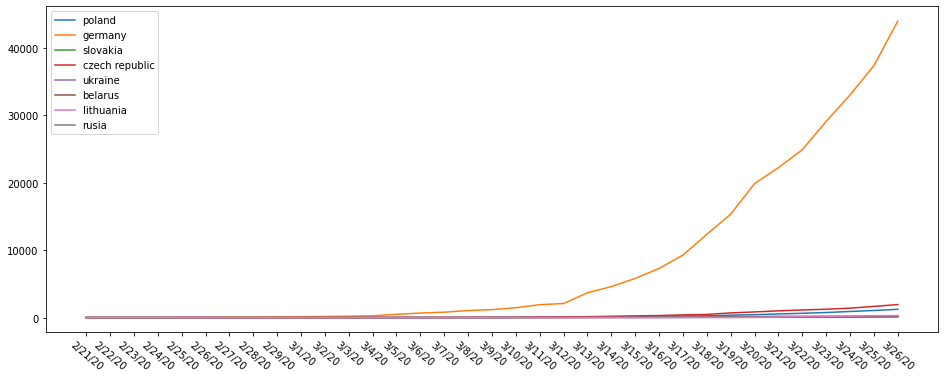

In [300]:
# poland vs all neighbours
plot_for_many_countries(['poland', 'germany', 'slovakia', 'czech republic', 'ukraine', 'belarus', 'lithuania', 'rusia'])

,0
cases,566318
deaths,25426
recovered,129360


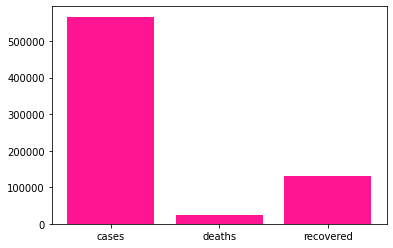

In [301]:
plot_for_all()
dataFrame_all()

,0
USA,93151
China,81340
Italy,80589
Spain,64059
Germany,49344
Iran,32332
France,29155
UK,14543
Switzerland,12311
S. Korea,9332


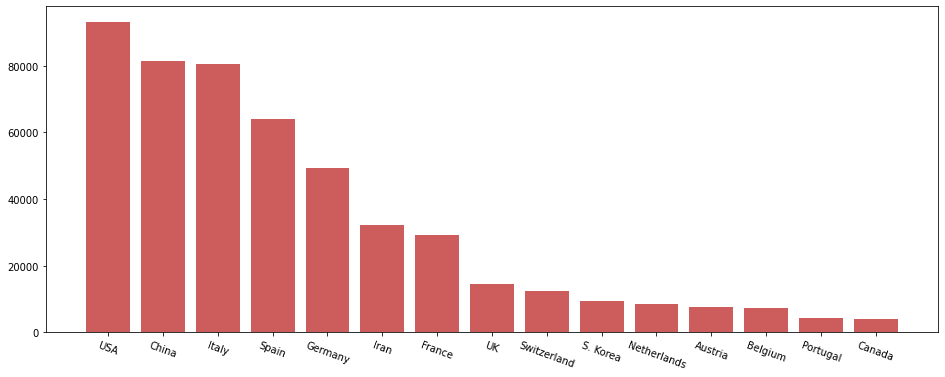

In [302]:
plot_for_max_cases(15)
df_max_cases(15)

,0
Italy,80589
Spain,64059
China,81340
Iran,32332
France,29155
USA,93151
UK,14543
Netherlands,8603
Germany,49344
Belgium,7284


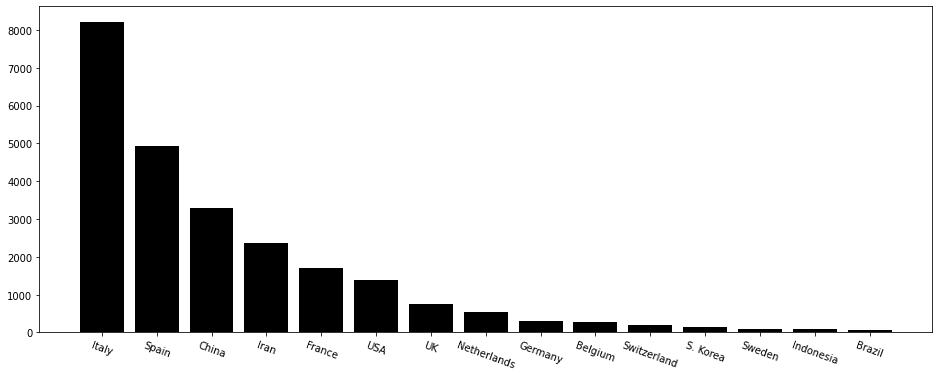

In [303]:
plot_for_max_dead(15)
df_max_death(15)

,0
China,81340
Iran,32332
Italy,80589
Spain,64059
Germany,49344
France,29155
S. Korea,9332
USA,93151
Switzerland,12311
Belgium,7284


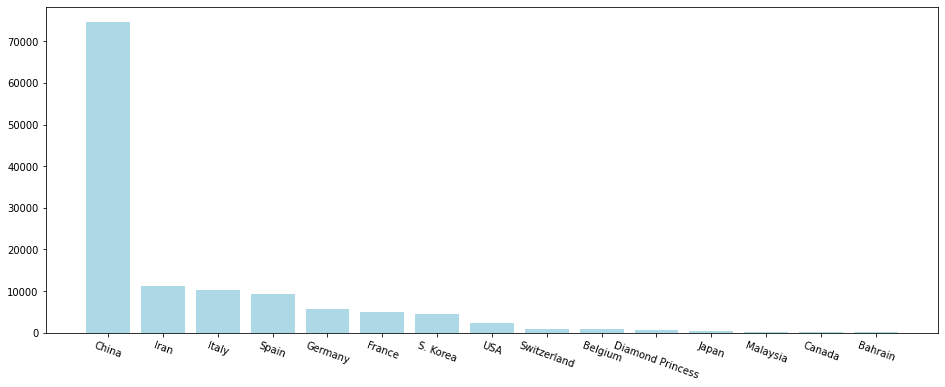

In [304]:
plot_for_max_recovered(15)
df_max_recovered(15)

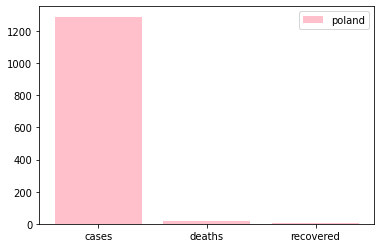

,0
cases,1289
deaths,16
recovered,7


In [305]:
plot_for_country('poland')

df_country('poland')

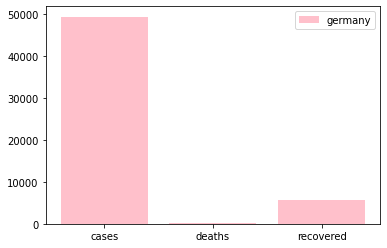

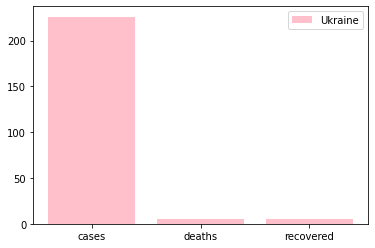

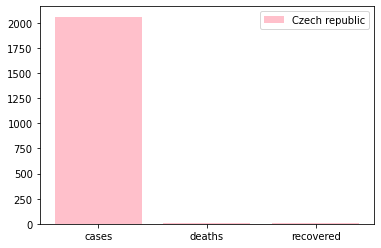

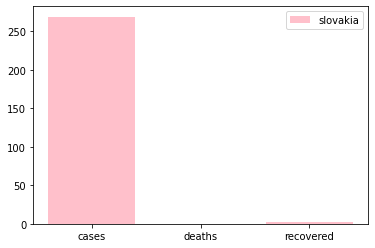

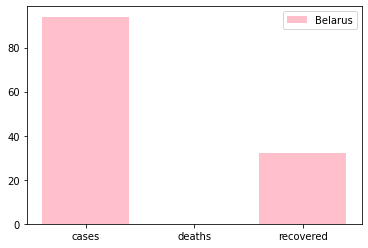

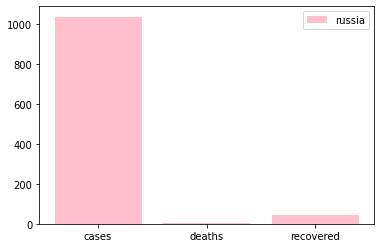

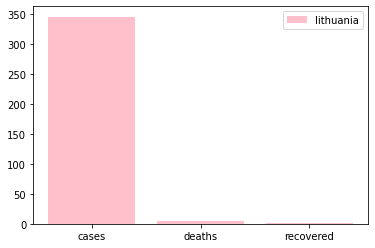

In [306]:
plot_for_country('germany')
plot_for_country('Ukraine')
plot_for_country('Czech republic')
plot_for_country('slovakia')
plot_for_country('Belarus')
plot_for_country('russia')
plot_for_country('lithuania')

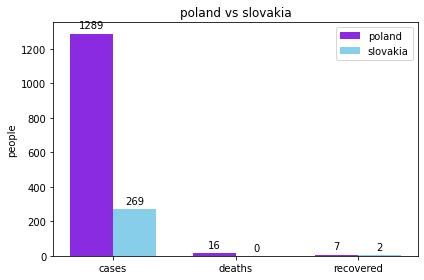

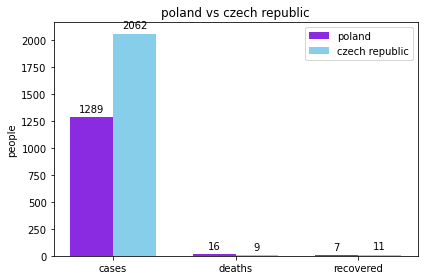

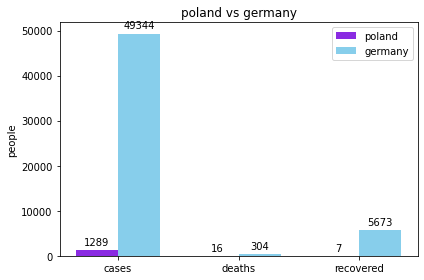

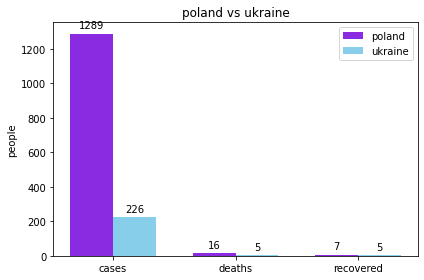

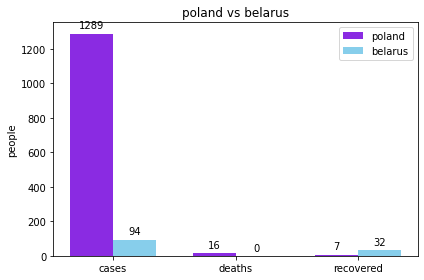

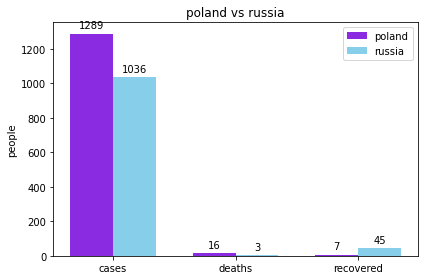

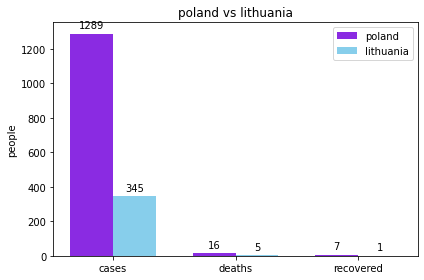

In [307]:
cases_comparasion('poland', 'slovakia')
cases_comparasion('poland', 'czech republic')
cases_comparasion('poland', 'germany')
cases_comparasion('poland', 'ukraine')
cases_comparasion('poland', 'belarus')
cases_comparasion('poland', 'russia')
cases_comparasion('poland', 'lithuania')

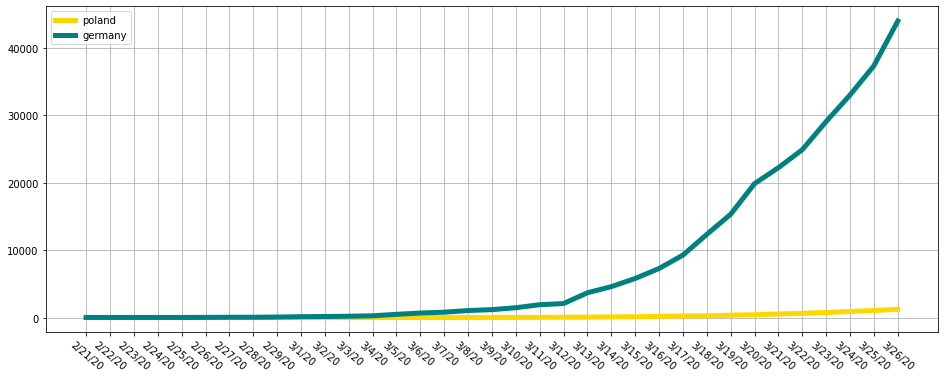

In [308]:
comaparasion_in_time('poland', 'germany')

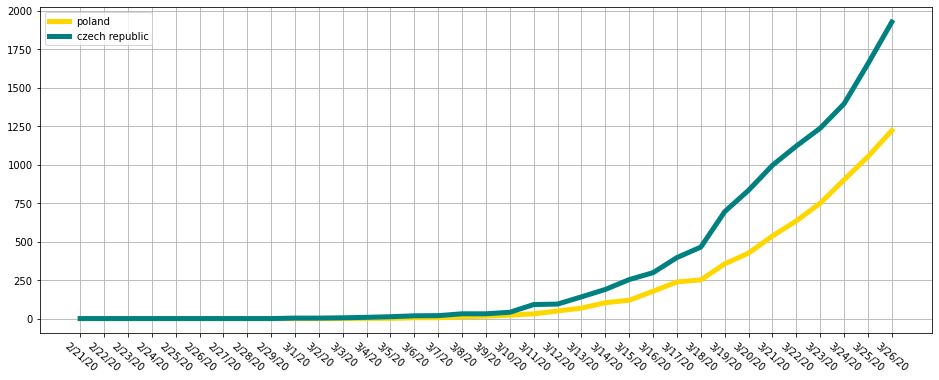

In [309]:
comaparasion_in_time('poland', 'czech republic')

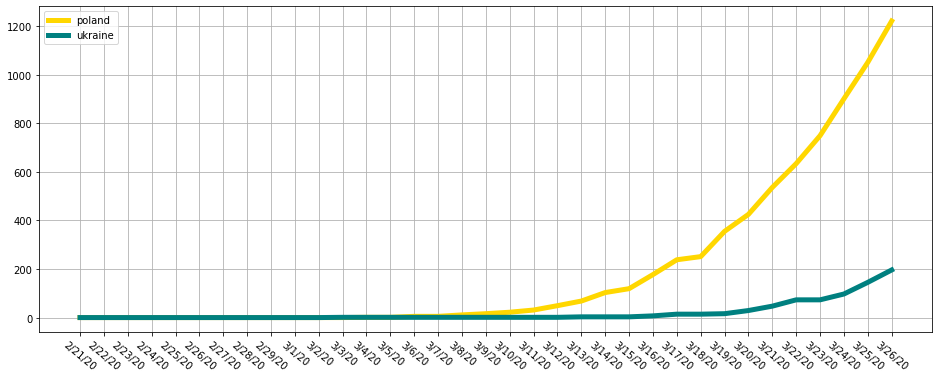

In [310]:
comaparasion_in_time('poland', 'ukraine')

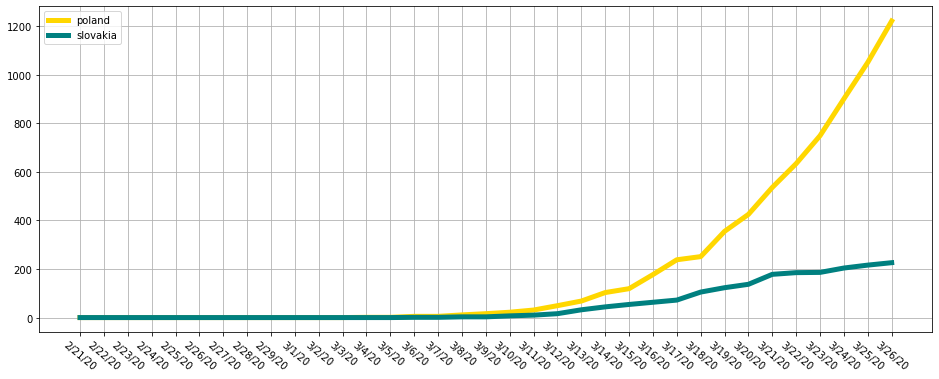

In [311]:
comaparasion_in_time('poland', 'slovakia')

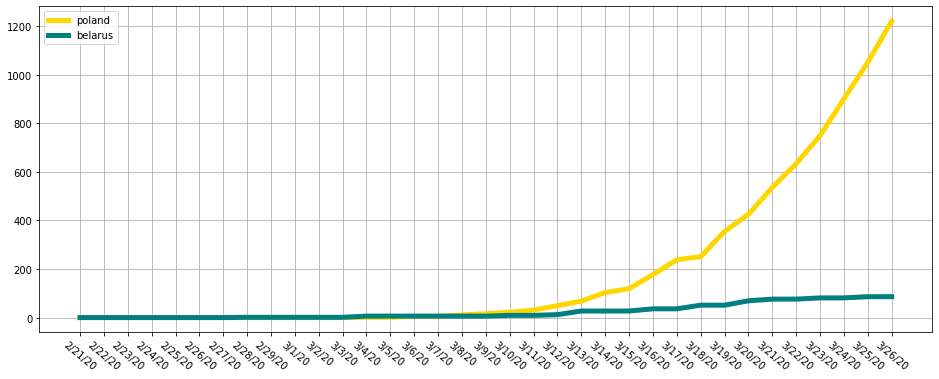

In [312]:
comaparasion_in_time('poland', 'belarus')

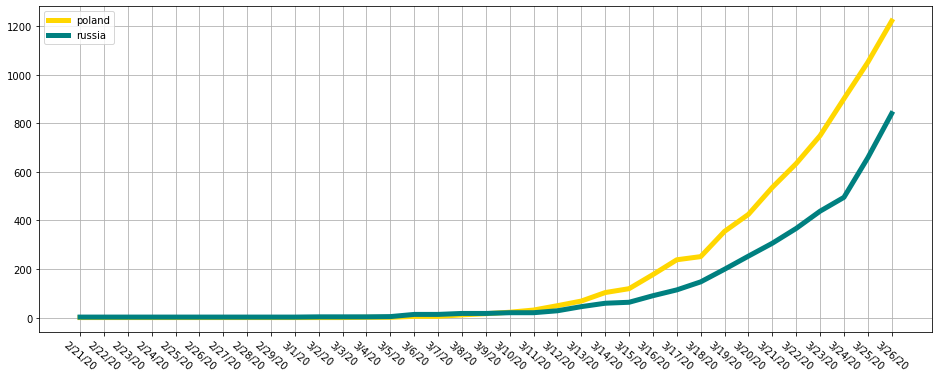

In [313]:
comaparasion_in_time('poland', 'russia')

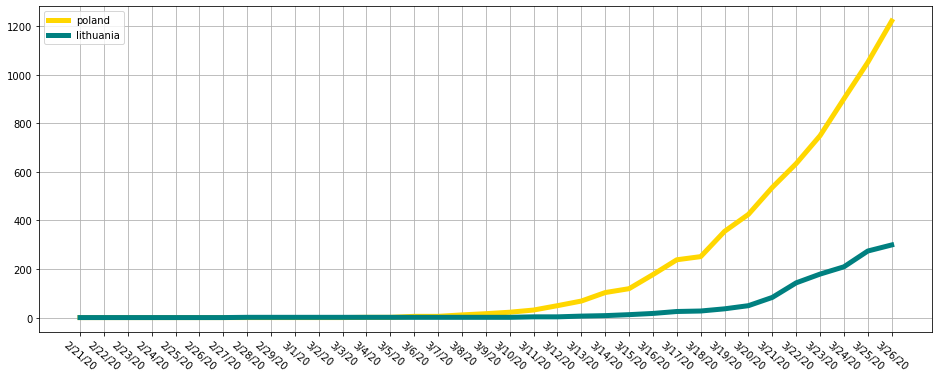

In [314]:
comaparasion_in_time('poland', 'lithuania')

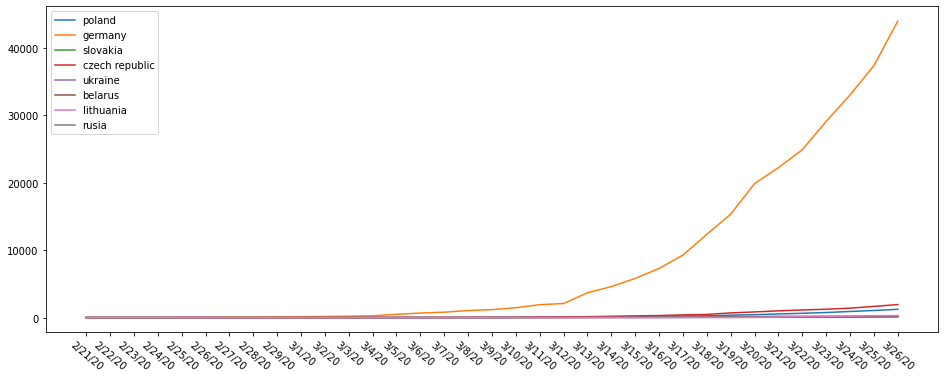

In [315]:
# poland vs all neighbours
plot_for_many_countries(['poland', 'germany', 'slovakia', 'czech republic', 'ukraine', 'belarus', 'lithuania', 'rusia'])